# Library Declaration

In [1]:
#Library Declaration
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from my_package import DataPreprocessor, LinearModel, Total_Class

# Load Dataset

In [2]:
# Load the dataset
train_df = pd.read_csv("train_energy_data.csv")
train_df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [3]:
# Information of Dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [4]:
# Missing value 
train_df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

# Visualization of Dataset

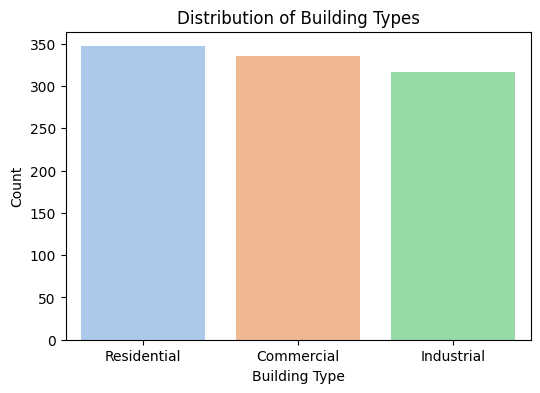

In [5]:
def plot_count_building_type(train):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train["Building Type"],hue=train["Building Type"] ,palette="pastel")
    plt.title("Distribution of Building Types")
    plt.xlabel("Building Type")
    plt.ylabel("Count")
    plt.show()
plot_count_building_type(train_df)

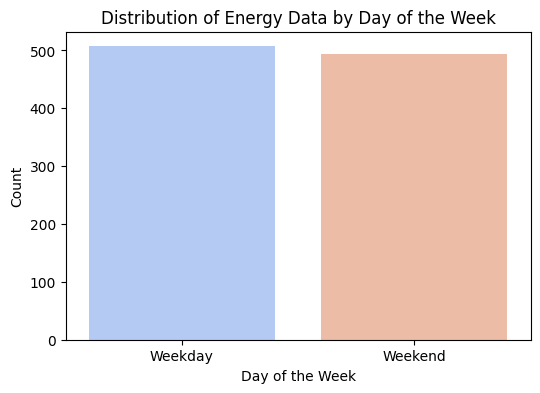

In [6]:
def plot_count_day_of_week(train):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train["Day of Week"],hue=train["Day of Week"], palette="coolwarm")
    plt.title("Distribution of Energy Data by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Count")
    plt.show()
plot_count_day_of_week(train_df)

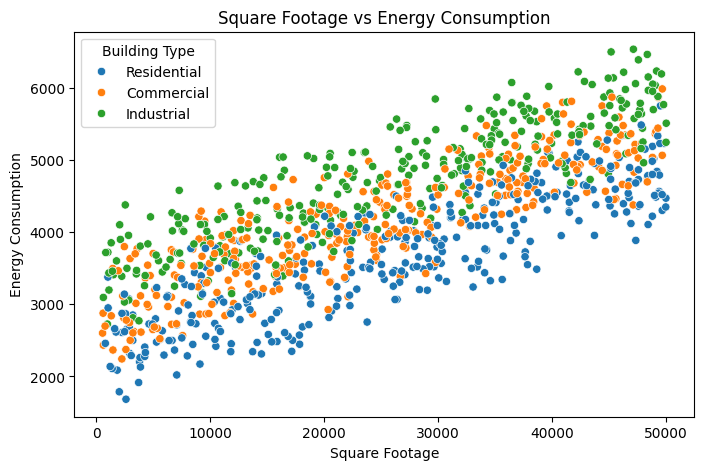

In [7]:
def plot_scatter_square_footage(train):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train["Square Footage"], y=train["Energy Consumption"], hue=train["Building Type"])
    plt.xlabel("Square Footage")
    plt.ylabel("Energy Consumption")
    plt.title("Square Footage vs Energy Consumption")
    plt.show()

plot_scatter_square_footage(train_df)

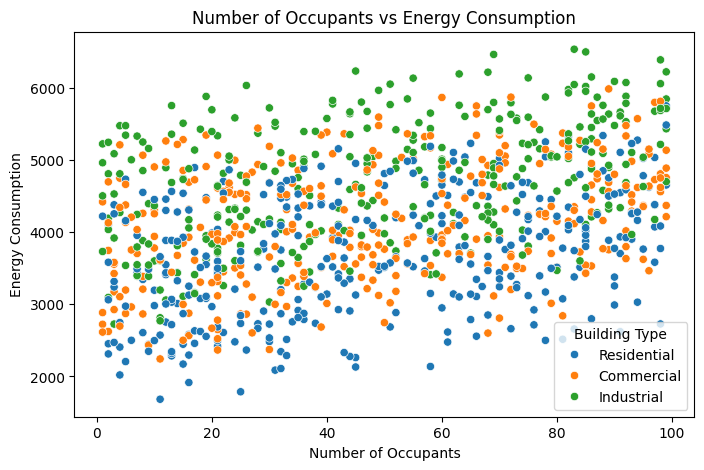

In [8]:
def plot_scatter_Occupants(train):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train["Number of Occupants"], y=train["Energy Consumption"], hue=train["Building Type"])
    plt.xlabel("Number of Occupants")
    plt.ylabel("Energy Consumption")
    plt.title("Number of Occupants vs Energy Consumption")
    plt.show()

plot_scatter_Occupants(train_df)

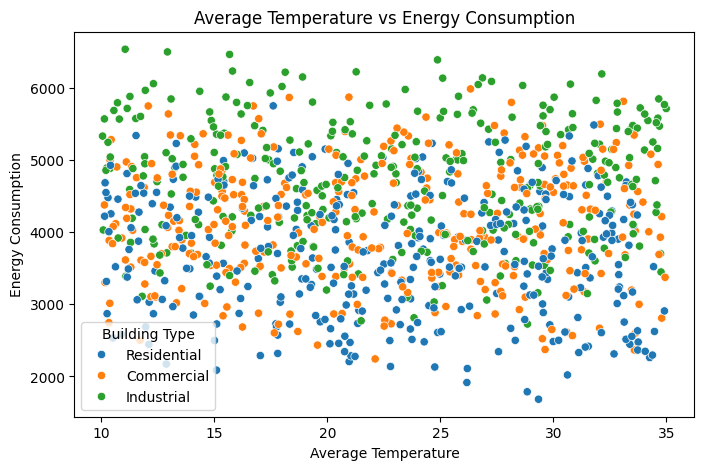

In [9]:
def plot_scatter_avarage_temp(train):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train["Average Temperature"], y=train["Energy Consumption"], hue=train["Building Type"])
    plt.xlabel("Average Temperature")
    plt.ylabel("Energy Consumption")
    plt.title("Average Temperature vs Energy Consumption")
    plt.show()

plot_scatter_avarage_temp(train_df)

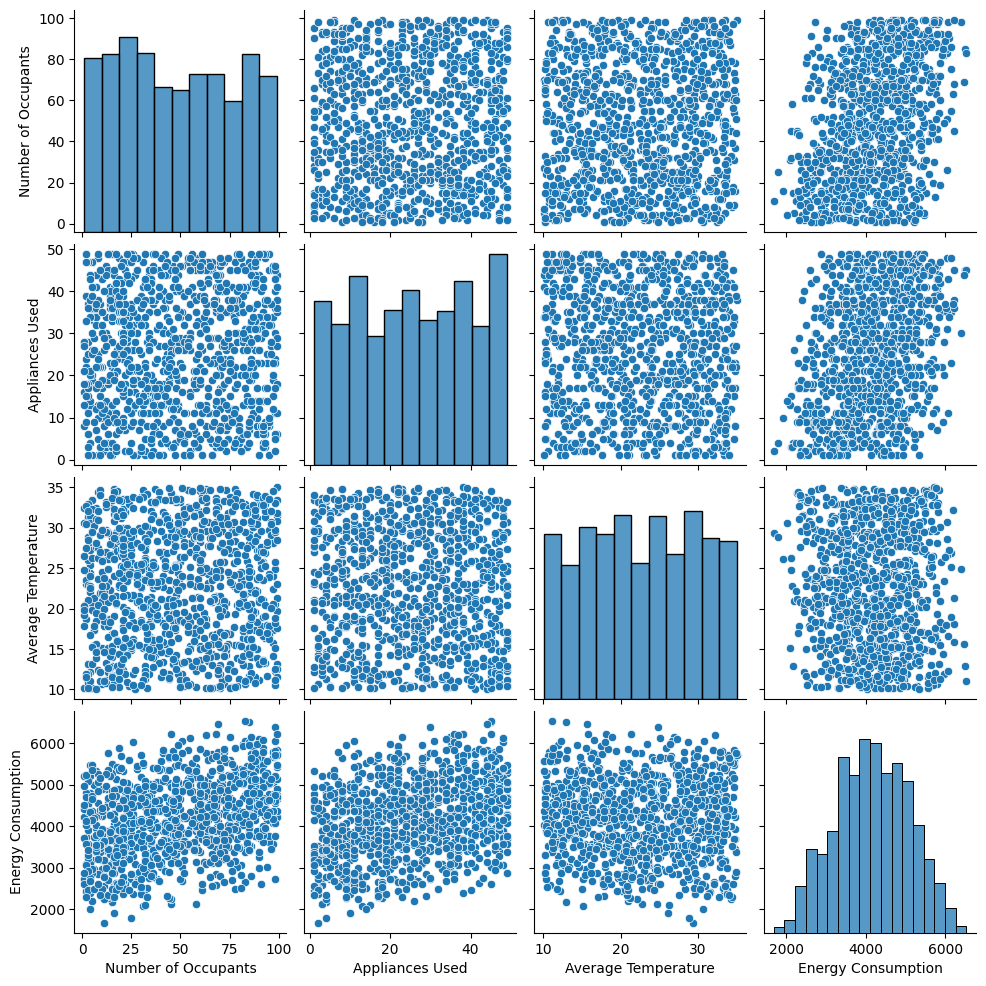

In [10]:
def plot_pairplot(train_df):
    sns.pairplot(train_df, vars=["Number of Occupants", "Appliances Used", "Average Temperature", "Energy Consumption"])
    plt.show()
plot_pairplot(train_df)

# Dataset Preprocessing

#### Here we Convert Non numerical value into numerical value and split Target value and External variable

In [11]:
# Data Preprocessing
train_preprocessor = DataPreprocessor(train_df)
train_encoded = train_preprocessor.encode_categorical()
X_train, y_train = train_preprocessor.get_features_target()

In [12]:
train_df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,1,7063,76,10,29.84,1,2713.95
1,2,44372,66,45,16.72,1,5744.99
2,3,19255,37,17,14.30,0,4101.24
3,1,13265,14,41,32.82,1,3009.14
4,2,13375,26,18,11.92,1,3279.17
...,...,...,...,...,...,...,...
995,1,14419,68,44,23.95,0,3661.21
996,3,12194,7,22,14.67,0,3546.34
997,2,39562,88,20,32.18,1,5147.21
998,1,8348,67,37,16.48,0,3244.98


In [13]:
# Summary statistics
print(train_df.describe())

       Building Type  Square Footage  Number of Occupants  ...  Average Temperature  Day of Week  Energy Consumption
count    1000.000000        1000.000          1000.000000  ...          1000.000000  1000.000000         1000.000000
mean        1.970000       25462.388            48.372000  ...            22.611390     0.507000         4166.252570
std         0.814717       14294.554            29.061972  ...             7.139943     0.500201          933.313064
min         1.000000         560.000             1.000000  ...            10.050000     0.000000         1683.950000
25%         1.000000       13169.750            22.000000  ...            16.475000     0.000000         3509.482500
50%         2.000000       25477.000            47.000000  ...            22.815000     1.000000         4175.730000
75%         3.000000       37446.250            73.250000  ...            28.850000     1.000000         4863.850000
max         3.000000       49997.000            99.000000  ...  

# Correlation between target and external variables

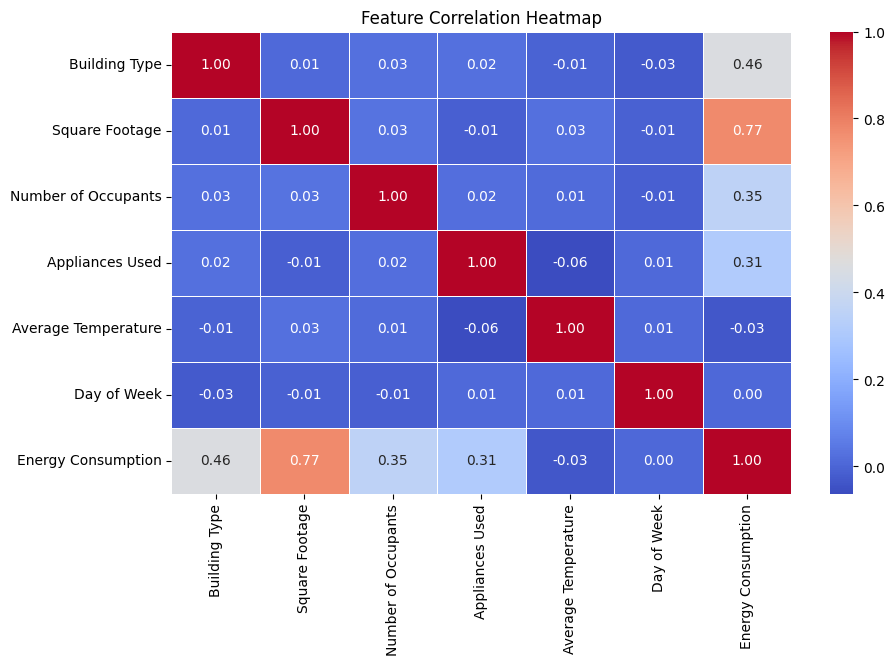

In [14]:
def plot_correlation_heatmap(train_encoded):
    plt.figure(figsize=(10, 6))
    sns.heatmap(train_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(train_encoded)

# Prepare Test Dataset

In [15]:
# Load test dataset
test_df = pd.read_csv("test_energy_data.csv")

# Shuffle the test dataset
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_preprocessor = DataPreprocessor(test_df)
test_encoded = test_preprocessor.encode_categorical()
X_test, y_test = test_preprocessor.get_features_target()

# Model Configuration

In [16]:
# Train Linear Regression Model
model = LinearModel()
model.train(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation

Mean Squared Error: 0.00, R² Score: 1.00


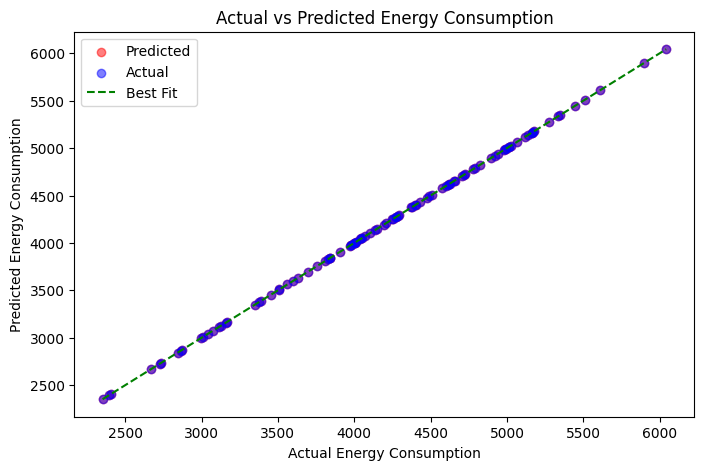

In [17]:
def plot_actual_vs_predicted(y_val, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_val, y_pred, alpha=0.5, label="Predicted", color='red')
    plt.scatter(y_val, y_val, alpha=0.5, label="Actual", color='blue')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'g--', label="Best Fit")
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Predicted Energy Consumption")
    plt.title("Actual vs Predicted Energy Consumption")
    plt.legend()
    plt.show()

# Model Evaluation
mse, r2 = model.evaluate(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}, R² Score: {r2:.2f}")
# Visualization
plot_actual_vs_predicted(y_test, y_pred)